# EDA(Explanatory Data Analysis)

下記、Amazon Forecastのdocにある、電力消費量データを用いる。
https://docs.aws.amazon.com/forecast/latest/dg/getting-started.html


48時間後までを予測する

# 0.データセットのダウンロード

In [2]:
# !wget -P ../input https://docs.aws.amazon.com/forecast/latest/dg/samples/electricityusagedata.zip

## 1.データセット読み込み

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../input/electricityusagedata.zip', names=['timestamp','demand','client'])

In [5]:
print(df.shape)
print(df['timestamp'].min())
print(df['timestamp'].max())
df.head()

(3241200, 3)
2014-01-01 01:00:00
2015-01-01 00:00:00


,timestamp,demand,client
0,2014-01-01 01:00:00,2.538071,client_0
1,2014-01-01 01:00:00,23.648649,client_1
2,2014-01-01 01:00:00,0.000000,client_2
3,2014-01-01 01:00:00,144.817073,client_3
4,2014-01-01 01:00:00,75.000000,client_4


In [6]:
df.tail()

,timestamp,demand,client
3241195,2015-01-01 00:00:00,6.875366,client_365
3241196,2015-01-01 00:00:00,658.911326,client_366
3241197,2015-01-01 00:00:00,150.250417,client_367
3241198,2015-01-01 00:00:00,664.772727,client_368
3241199,2015-01-01 00:00:00,6810.810811,client_369


In [35]:
df[df.timestamp<='2014-01-30'].to_csv('for_excel_201401.csv')

In [33]:
df.describe()

,demand
count,3.241200e+06
mean,6.065168e+02
std,3.518405e+03
min,0.000000e+00
25%,5.028811e+01
50%,1.193248e+02
75%,3.046662e+02
max,1.682000e+05


In [52]:
print(df.shape)
df['client'].unique().shape

(3241200, 3)


(370,)

In [54]:
3241200 / 370 / 24

365.0

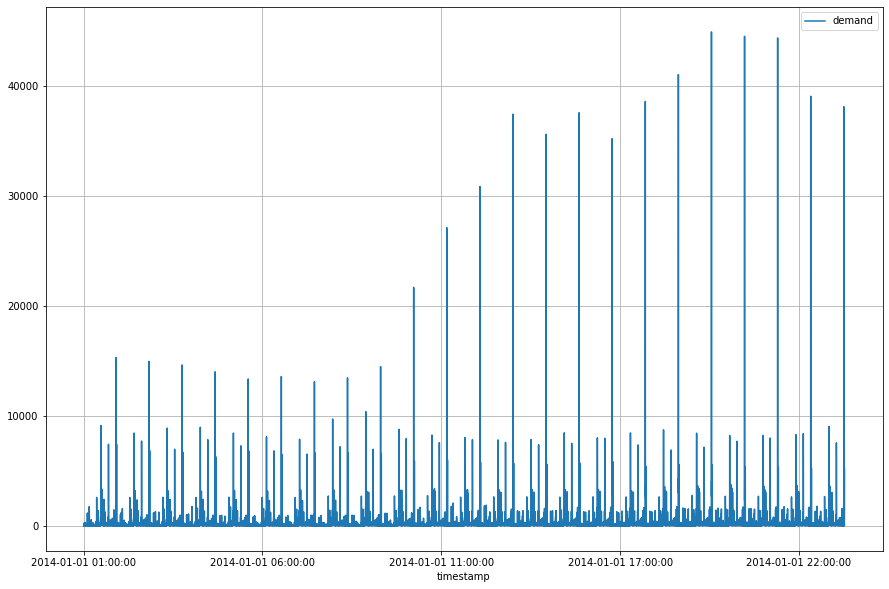

In [28]:
df[df.timestamp<='2014-01-02'].plot(x=df.columns[0], figsize=[15,10], grid=True)

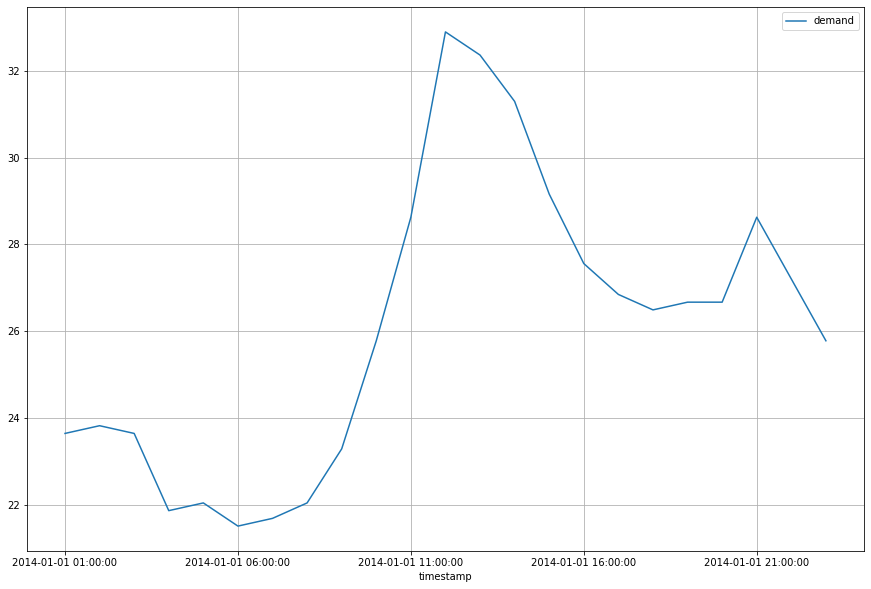

In [31]:
df[(df.timestamp<='2014-01-02') & (df.client =='client_1')].plot(x=df.columns[0], figsize=[15,10], grid=True)

In [32]:
i

fig, ax = plt.subplots()
ax.plot(x,y1) # グラフ１
ax.plot(x,y2) # グラフ２

NameError: name 'plt' is not defined

# クラスタ特徴量

・ターゲットの相関係数を使う方法
optiverより

・Scikit-learnのパッケージを使う方法
https://aws.amazon.com/jp/blogs/machine-learning/cluster-time-series-data-for-use-with-amazon-forecast/


tslearn.clustering

In [36]:
df.head(3)

,timestamp,demand,client
0,2014-01-01 01:00:00,2.538071,client_0
1,2014-01-01 01:00:00,23.648649,client_1
2,2014-01-01 01:00:00,0.000000,client_2


In [49]:
train_p = df.pivot(index='timestamp', columns='client', values='demand')

In [50]:
train_p.head()

client,client_0,client_1,client_10,client_100,client_101,client_102,client_103,client_104,client_105,client_106,...,client_90,client_91,client_92,client_93,client_94,client_95,client_96,client_97,client_98,client_99
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,2.538071,23.648649,56.073025,141.986063,288.639366,309.322034,104.455446,45.865279,0.0,0.0,...,69.212809,33.099688,1.269036,7.832239,3.143007,6.231884,168.592437,222.405272,327.148438,10.652463
2014-01-01 02:00:00,2.855330,23.826458,48.435171,113.240418,255.944518,259.745763,102.722772,46.276013,0.0,0.0,...,72.881921,33.229491,1.142132,9.474482,3.273965,6.811594,160.189076,205.107084,272.460938,10.818908
2014-01-01 03:00:00,2.855330,23.648649,43.219076,119.337979,1274.768824,258.898305,100.000000,46.549836,0.0,0.0,...,74.382922,32.320872,1.395939,7.832239,3.404924,7.536232,160.714286,185.749588,262.695312,10.153129
2014-01-01 04:00:00,2.855330,21.870555,39.120715,112.369338,1786.327609,255.084746,99.257426,44.906900,0.0,0.0,...,70.380254,32.450675,1.776650,8.337544,3.535883,6.521739,169.117647,182.866557,220.703125,10.319574
2014-01-01 05:00:00,2.538071,22.048364,37.816692,111.498258,906.208719,258.050847,92.079208,44.496166,0.0,0.0,...,74.382922,32.450675,1.142132,9.095503,3.143007,6.956522,165.441176,184.925865,188.476562,11.151798


In [48]:
train_p[train_p.isnull()]

client,client_0,client_1,client_10,client_100,client_101,client_102,client_103,client_104,client_105,client_106,...,client_90,client_91,client_92,client_93,client_94,client_95,client_96,client_97,client_98,client_99
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
corr = train_p.corr()

In [43]:
corr

client,client_0,client_1,client_10,client_100,client_101,client_102,client_103,client_104,client_105,client_106,...,client_90,client_91,client_92,client_93,client_94,client_95,client_96,client_97,client_98,client_99
client,,,,,,,,,,,,,,,,,,,,,
client_0,1.000000,0.260986,-0.107399,0.056998,0.100580,0.013552,0.070387,0.081848,0.076943,0.210632,...,-0.121487,0.020473,0.051106,0.075733,-0.056927,-0.023644,-0.131826,-0.001634,0.036245,0.113694
client_1,0.260986,1.000000,0.186168,0.520887,0.041390,0.494558,0.517327,0.539094,0.235884,0.437069,...,-0.060897,0.282115,0.147995,0.115841,0.248265,0.185307,0.136175,0.459352,0.526711,0.563573
client_10,-0.107399,0.186168,1.000000,0.386449,0.037813,0.450563,0.320252,0.268846,-0.041997,0.089156,...,-0.200906,0.135978,-0.050347,0.073349,0.303405,0.239546,0.153832,0.416081,0.365014,0.119888
client_100,0.056998,0.520887,0.386449,1.000000,0.240468,0.953923,0.930957,0.900007,0.351551,0.342429,...,0.220175,0.393297,0.354133,0.015944,0.332508,0.314960,0.257856,0.927812,0.962712,0.805820
client_101,0.100580,0.041390,0.037813,0.240468,1.000000,0.254464,0.283623,0.281675,0.015722,0.019333,...,0.216435,0.026798,0.098364,-0.071025,-0.009711,-0.042960,-0.025879,0.329520,0.290471,0.222181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
client_95,-0.023644,0.185307,0.239546,0.314960,-0.042960,0.429260,0.447607,0.413111,0.744168,0.250350,...,0.238042,0.836228,0.523239,0.286797,0.774622,1.000000,0.803631,0.373794,0.301409,0.426896
client_96,-0.131826,0.136175,0.153832,0.257856,-0.025879,0.382165,0.386547,0.364440,0.699747,0.157114,...,0.227871,0.793031,0.438921,0.249406,0.727101,0.803631,1.000000,0.328959,0.240094,0.369419
client_97,-0.001634,0.459352,0.416081,0.927812,0.329520,0.949657,0.930641,0.893771,0.350798,0.294596,...,0.315084,0.445085,0.363913,-0.003076,0.404034,0.373794,0.328959,1.000000,0.924689,0.788348


In [40]:
ids = corr.index

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(corr.values)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [46]:
print(kmeans.labels_)


NameError: name 'kmeans' is not defined

### ts-learnを使う場合

In [56]:
!pip install tslearn

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 793 kB 21.3 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [57]:
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

/opt/conda/lib/python3.7/site-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [61]:
import numpy as np

In [62]:
from tslearn import metrics
from tslearn.utils import to_time_series_dataset

In [64]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
#t = scaler.fit_transform(np.nan_to_num(to_time_series_dataset(df.values.T)))
t = scaler.fit_transform(np.nan_to_num(to_time_series_dataset(train_p.values.T)))

In [68]:
t.shape

(370, 8760, 1)

In [69]:
path, sim = metrics.dtw_path(t[0], t[1])

In [76]:
sim

61.363219719235985

In [79]:
import matplotlib.pyplot as plt

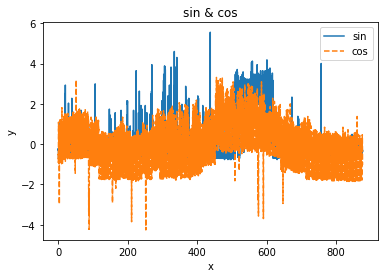

<Figure size 720x720 with 0 Axes>

In [82]:
#pd.concat(pd.Series(t[0]),pd.Series(t[1]))

x = np.arange(0, 876, 0.1)
y1=t[0]
y2=t[1]

plt.plot(x,y1,label="sin")
plt.plot(x,y2,linestyle="--", label="cos")
plt.xlabel("x")
plt.ylabel("y")
plt.title('sin & cos')
plt.legend()
plt.figure(figsize=(10,10))
plt.show()

## 2.データ分割
48時間後(48points)を予測する。  

all:2014-01-01 01:00:00 〜 2015-01-01 00:00:00  

### train1
train:2014-01-01 01:00:00 〜 2014-06-28 23:00:00  
valid:2014-06-29 00:00:00 〜 2014-06-30 23:00:00(48h)

### train2(for pred)
train:2014-01-01 01:00:00 〜 2014-06-30 23:00:00  
valid:2014-07-01 00:00:00 〜 2014-07-02 23:00:00(48h)


In [ ]:
df['client'] = df['client'].str.replace('client_','').astype(int)

In [ ]:
df.head()

## 2.特徴量生成

### 1)時刻型に変換し、特徴量（時間帯、曜日）を抽出

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['num_of_week'] = df['timestamp'].dt.dayofweek

In [ ]:
df['hour'] = df['timestamp'].dt.hour

### 2)clientごとに時間差の値を特徴量にもつ（36hより前である必要がある）

In [ ]:
df["before_36h"] = df.groupby(['client']).shift(36)['demand'].reset_index()['demand']
df["before_37h"] = df.groupby(['client']).shift(37)['demand'].reset_index()['demand']
df["before_38h"] = df.groupby(['client']).shift(38)['demand'].reset_index()['demand']
df["before_48h"] = df.groupby(['client']).shift(48)['demand'].reset_index()['demand']
df["before_72h"] = df.groupby(['client']).shift(72)['demand'].reset_index()['demand']
df["before_96h"] = df.groupby(['client']).shift(96)['demand'].reset_index()['demand']

### 3)clientごとに期間で集約する

In [ ]:
df = df.sort_values(["client","timestamp"]).reset_index()
df['mean_24h'] = df.groupby(['client']).rolling(24)['demand'].mean().reset_index()['demand']
df['var_24h'] = df.groupby(['client']).rolling(24)['demand'].var().reset_index()['demand']

In [ ]:
#df = df.sort_values(["client","timestamp"]).reset_index()
#df['mean_24h_before_36h'] = df.groupby(['client']).rolling(2)['demand'].mean().reset_index()['demand']

In [ ]:
df["mean_24h_before_36h"] = df.groupby(['client']).shift(36)['mean_24h'].reset_index()['mean_24h']
df["var_24h_before_36h"] = df.groupby(['client']).shift(36)['var_24h'].reset_index()['var_24h']

In [ ]:
df[df.client==21].head()

In [ ]:
df[df.client==21].tail()

In [ ]:
feature_col = [
    'client',
    'num_of_week',
    'hour',
    'before_36h',
    'before_37h',
    'before_38h',
    'before_48h',
    'before_72h',
    'before_96h',
    'mean_24h_before_36h',
    'var_24h_before_36h'
]

## 3.データ分割
all:2014-01-01 01:00:00 〜 2015-01-01 00:00:00  
train:2014-01-01 01:00:00 〜 2014-12-29 00:00:00  
valid:2014-12-29 01:00:00 〜 2014-12-30 12:00:00(36h)  
test:2014-12-30 13:00:00 〜 2015-01-01 00:00:00(36h)  

In [ ]:
df_train = df[df.timestamp <= '2014-12-29 00:00:00']

In [ ]:
df_valid = df[(df.timestamp >= '2014-12-29 01:00:00') & (df.timestamp <= '2014-12-30 12:00:00')]

In [ ]:
df_test = df[df.timestamp >= '2014-12-30 13:00:00']

In [ ]:
df_train[df_train.client==21].shape

In [ ]:
df_valid[df_valid.client==21].shape

In [ ]:
df_test[df_test.client==21].shape

In [ ]:
tr_x = df_train[feature_col]
tr_y = df_train['demand']

In [ ]:
va_x = df_valid[feature_col]
va_y = df_valid['demand']

In [ ]:
test_x = df_test[feature_col]
test_y = df_test[['timestamp','client','demand']]

# XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(tr_x, label=tr_y)
dvalid = xgb.DMatrix(va_x, label=va_y)
dtest = xgb.DMatrix(test_x)

## 4.モデル学習
誤差はRMSEを用いる

https://docs.aws.amazon.com/ja_jp/forecast/latest/dg/metrics.html

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#fit by best params
regressor = xgb.XGBRegressor(n_estimators=50)

In [ ]:
regressor.fit(tr_x, tr_y, eval_metric="rmse", eval_set=[(va_x, va_y)])

## 5.モデル評価

### testデータでのRMSE

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
test_y

In [ ]:
### RMSEを出力
np.sqrt(mean_squared_error(test_y['demand'], regressor.predict(test_x)))

### 重要度の可視化

In [ ]:
xgb.plot_importance(regressor)

## 6.推論（予測）
https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py

In [ ]:
regressor.predict(test_x)

## 7.推論結果の可視化
client_21について  
正解データ  
Amazon Foreast  
xgboost  

In [ ]:
df_xgb = pd.DataFrame(regressor.predict(test_x[test_x.client==21]), columns=['xgb'])

In [ ]:
df_xgb

In [ ]:
df_y = pd.DataFrame(test_y[test_y.client==21]['demand'], columns=['demand']).reset_index(drop=True)

In [ ]:
df_y

### Foreastの結果

In [ ]:
#df_forecast = pd.read_csv('../amazon_forecast_official_dev_guide/export_forecast_drop1week/my_forecast_export_drop1week_2021-03-03T07-51-36Z_part1.csv')
df_forecast = pd.read_csv('../input/my_forecast_export_drop1week_2021-03-03T07-51-36Z_part1.csv')




In [ ]:
df_forecast['item_id'].unique()

In [ ]:
df_result = df_forecast[df_forecast.item_id=='client_21'].reset_index(drop=True)

In [ ]:
df_result

In [ ]:
pd.concat([df_result, df_xgb, df_y], axis=1).plot(x='date',figsize=(20,5), grid=True)

# XGBoostの利点
特徴量の重要度がわかる

【デメリット】
コードのデバッグが大変
特徴量を作り込む必要あり
ハイパーパラメータのチューニング
